#### Ratings Prediction¶

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

#### Part 1 - Extraction

In [1]:
# Importing Libraries
import selenium
import pandas as pd
from selenium import webdriver # Importing selenium webdriver 
from selenium.common.exceptions import NoSuchElementException # Importing required Exceptions which needs to handled
import time

In [2]:
# Activating the chrome browser
driver=webdriver.Chrome('C:/Users/MANI/chromedriver_win32/chromedriver.exe')

In [3]:
# Opening the homepage of Amazon.in
driver.get("https://www.amazon.in/")

In [4]:
product=driver.find_element_by_xpath('//input[@id="twotabsearchtextbox"]')
product.send_keys('laptops')

In [5]:
search_button=driver.find_element_by_xpath("//input[@id='nav-search-submit-button']")
search_button.click()

In [6]:
 # appending all the urls to url list
url=[]
for page in range(0,19):
        link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a")
        for i in link:
            h=i.get_attribute('href')
            url.append(h)
        next_page=driver.find_element_by_xpath("//li[@class='a-last']//a") # Moving to next page
        next_page1=next_page.get_attribute("href")
        driver.get(next_page1)

In [7]:
len(url)

358

In [9]:
l=[]
for a in url:
    driver.get(a)
    try:
        xt=driver.find_element_by_xpath("//div[@class= 'a-row a-spacing-medium']/a")
        if xt != None:
            tt=xt.get_attribute("href")
            driver.get(tt)
            xt1=driver.find_elements_by_xpath("//div//a[@class= 'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")       
            if xt1 != None:
                for i in xt1:
                    h=i.get_attribute('href')
                    l.append(h)  
    except(NoSuchElementException):
        pass

In [10]:
review=[]
rating=[]
for b in l:    
    driver.get(b)
    try:
        xt=driver.find_element_by_xpath("//div//span[@class= 'a-size-medium a-color-base']") # Extracting Review from xpath
        rating.append(xt.text)
        xt1=driver.find_element_by_xpath("//div//span[@class= 'a-size-base review-text review-text-content']/span") # Extracting Rating from xpath
        review.append(xt1.text)
    except(NoSuchElementException):
        pass

In [12]:
len(review)

1689

In [13]:
len(rating)

1690

In [15]:
Ratings = pd.DataFrame({}) # saving scraped data into dataframe.
Ratings['Review'] = review[:1689]
Ratings['Rating'] = rating[:1689]
Ratings

,Review,Rating
0,Within 10min of Receipt Lap top become OFF\nFa...,3.6 out of 5
1,Deliver: Very sharp\n\nProduct: I needed a lap...,3.6 out of 5
2,Overall good configuration for the given price...,3.6 out of 5
3,Really love this product. I have actually boug...,3.6 out of 5
4,Bought this as a backup to my 6 years old lapt...,3.6 out of 5
...,...,...
1684,u can surely get something better than this\nl...,3.6 out of 5
1685,Worst company... Don't buy any products from d...,3.6 out of 5
1686,From no where the laptop gave a feeling of Del...,3.6 out of 5
1687,"light weight, super performance",3.4 out of 5


In [16]:
Ratings.to_csv('amazon_review_rating.csv')

#### Part 2 - Modelling

#### Pre-processing

In [88]:
df=pd.read_csv('amazon_review_rating.csv')

In [89]:
df.head()

,Unnamed: 0,Review,Rating
0,0,Within 10min of Receipt Lap top become OFF\nFa...,3.6 out of 5
1,1,Deliver: Very sharp\n\nProduct: I needed a lap...,3.6 out of 5
2,2,Overall good configuration for the given price...,3.6 out of 5
3,3,Really love this product. I have actually boug...,3.6 out of 5
4,4,Bought this as a backup to my 6 years old lapt...,3.6 out of 5


In [90]:
df.shape

(1689, 3)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1689 non-null   int64 
 1   Review      1689 non-null   object
 2   Rating      1689 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.7+ KB


In [92]:
# Let's see how many Null Values are present
df.isnull().sum()

Unnamed: 0    0
Review        0
Rating        0
dtype: int64

In [93]:
# let's drop Unnamed column
df=df.drop(columns=["Unnamed: 0"], axis=1)

In [94]:
df['Rating']=df['Rating'].str.replace('out of 5', '')
df["Rating"] = pd.to_numeric(df["Rating"])

In [95]:
# rating=df['Rating']
# ratings=[]
# for i in rating:
#     ratings.append(round(i))

In [96]:
rating=df['Rating']
ratings=[]
for x in rating:
    y=x
    x=int(x)
    if ((y-x) >= 0.5):
        z=x+1
        ratings.append(z)
    else:
        ratings.append(x)

In [97]:
df['Rating']=ratings

In [98]:
df['Rating'].value_counts()

4    1211
3     333
5     116
2      23
1       6
Name: Rating, dtype: int64

In [99]:
df.head()

,Review,Rating
0,Within 10min of Receipt Lap top become OFF\nFa...,4
1,Deliver: Very sharp\n\nProduct: I needed a lap...,4
2,Overall good configuration for the given price...,4
3,Really love this product. I have actually boug...,4
4,Bought this as a backup to my 6 years old lapt...,4


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

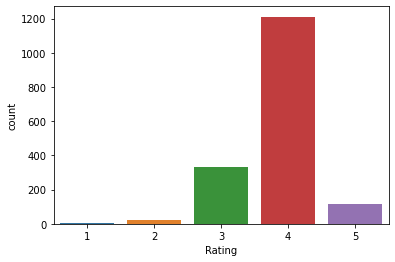

In [101]:
# Let's see how our Target column is distributed
sns.countplot(df['Rating'])
plt.show()

#### Data Cleaning or Pre-Processing

In [102]:
df['Review'] = df['Review'].str.lower()

In [103]:
df['Review']=df['Review'].str.replace('[^a-zA-z]',' ')

In [104]:
df['Review']=df['Review'].str.strip()

In [105]:
df['Review']=df['Review'].str.split()

In [106]:
df.head()

,Review,Rating
0,"[within, min, of, receipt, lap, top, become, o...",4
1,"[deliver, very, sharp, product, i, needed, a, ...",4
2,"[overall, good, configuration, for, the, given...",4
3,"[really, love, this, product, i, have, actuall...",4
4,"[bought, this, as, a, backup, to, my, years, o...",4


In [107]:
#Removing Stopwords
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english') + ['laptop'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df['Review']=df['Review'].apply(lambda x:[w for w in x if w not in stop])

In [109]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

In [110]:
df['Review']=df['Review'].apply(lambda x:[stemmer.stem(w)for w in x])

In [111]:
df.head()

,Review,Rating
0,"[within, min, receipt, lap, top, becom, failur...",4
1,"[deliv, sharp, product, need, quit, good, conf...",4
2,"[overal, good, configur, given, price, look, w...",4
3,"[realli, love, product, actual, bought, fell, ...",4
4,"[bought, backup, year, old, perform, wise, man...",4


In [112]:
df['Review']=df['Review'].apply(lambda x:" ".join(x))

In [113]:
df.head()

,Review,Rating
0,within min receipt lap top becom failur produc...,4
1,deliv sharp product need quit good configur su...,4
2,overal good configur given price look wise nic...,4
3,realli love product actual bought fell vostro ...,4
4,bought backup year old perform wise mani compl...,4


In [114]:
df.duplicated().sum()

227

In [115]:
df=df.drop_duplicates()

In [116]:
df.shape

(1462, 2)

In [117]:
from wordcloud import WordCloud

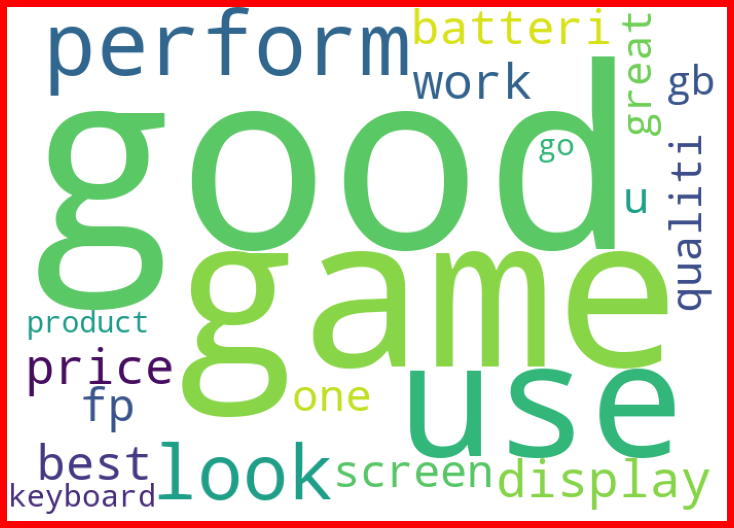

In [124]:
best = df['Review'][df['Rating']==5]

best_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(best))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(best_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

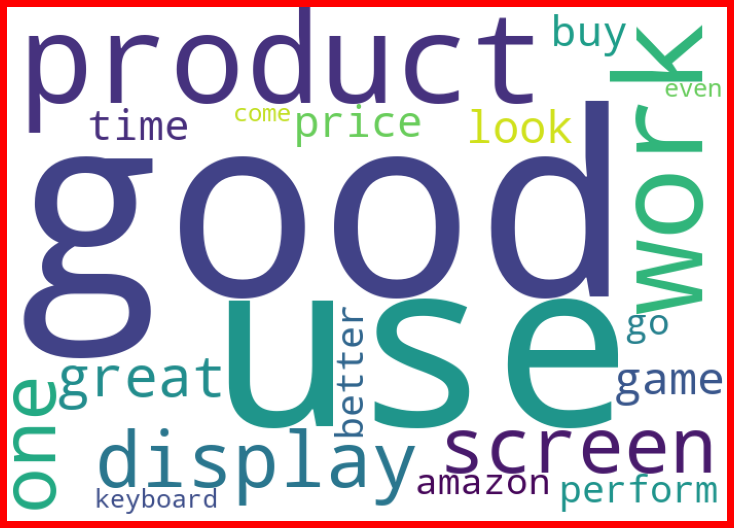

In [125]:
better = df['Review'][df['Rating']==4]

better_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(better))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(better_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

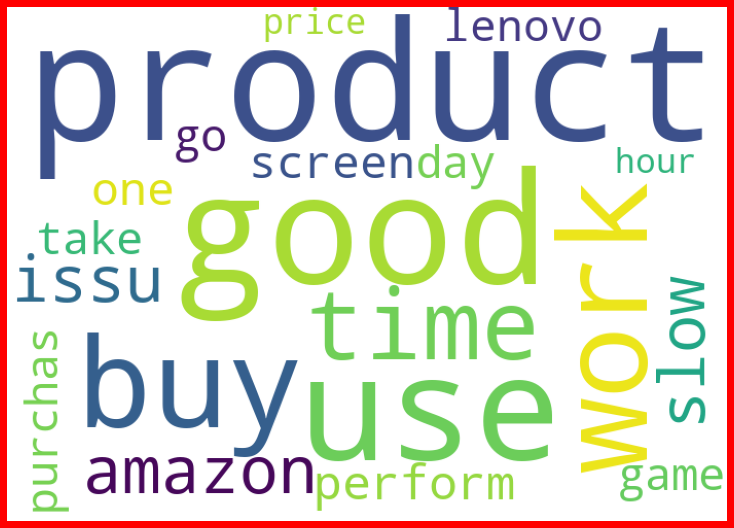

In [126]:
good = df['Review'][df['Rating']==3]

good_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(good))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(good_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

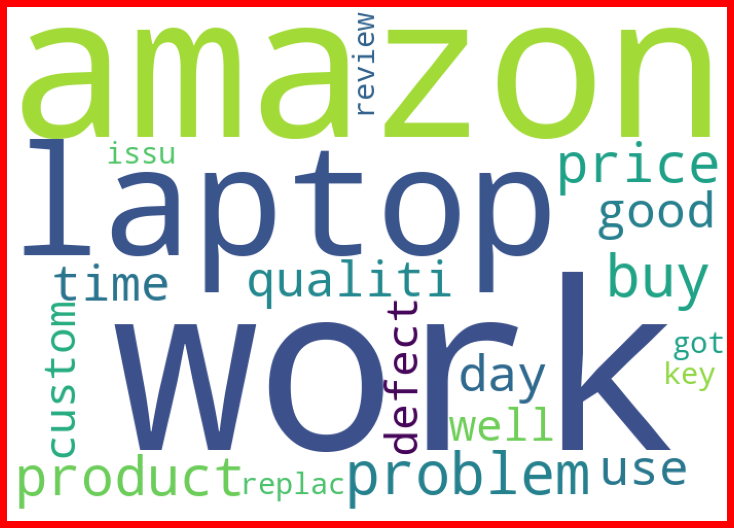

In [128]:
avg = df['Review'][df['Rating']==2]

avg_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(avg))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(avg_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

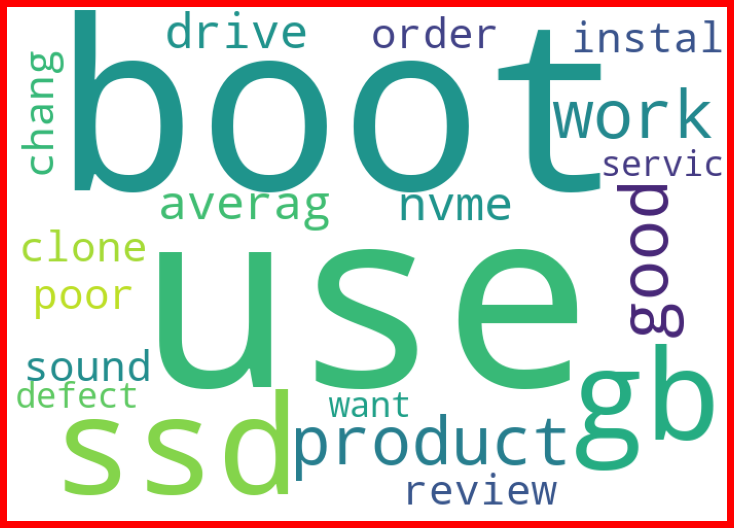

In [129]:
bad = df['Review'][df['Rating']==1]

bad_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(bad))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(bad_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [130]:
#1. Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Review'])

X = features
y = df['Rating']
X.shape

(1462, 4277)

In [131]:
y.shape

(1462,)

In [132]:
# Train and test splitting
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42)

#### MODEL BUILDING

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RF=RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced',random_state=42)
RF.fit(X_train,Y_train)
y_pred_train=RF.predict(X_train)
y_pred_test=RF.predict(X_test)
print("Accuracy Train:",accuracy_score(Y_train,y_pred_train).round(2))
print("Accuracy Test:",accuracy_score(Y_test,y_pred_test).round(2))

Accuracy Train: 0.99
Accuracy Test: 0.7


hyperparameter tunning:

In [167]:
model_params={"n_estimators":[80,90,100,110,120,130,140,150,160],
              "criterion":['gini','entropy'],
              "max_depth":range(1,10),
              "max_features":range(5,15)}

In [169]:
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestClassifier(random_state=15)

In [170]:
models=RandomizedSearchCV(model,model_params,random_state=15)

In [171]:
best_model=models.fit(X_train,Y_train)

C:\Users\MANI\anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  # Determine the optimal number of samples from each class in each fold,


In [172]:
y_pred_train=best_model.predict(X_train)
y_pred_test=best_model.predict(X_test)
print("Accuracy Train:",accuracy_score(Y_train,y_pred_train).round(2))
print("Accuracy Test:",accuracy_score(Y_test,y_pred_test).round(2))

Accuracy Train: 0.69
Accuracy Test: 0.7


In [175]:
print(confusion_matrix(Y_test,y_pred_test))

[[  0   0   1   3   0]
 [  0   0   0   3   0]
 [  0   0   6  65   0]
 [  0   0   9 249   0]
 [  0   0   1  29   0]]


In [176]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.35      0.08      0.14        71
           4       0.71      0.97      0.82       258
           5       0.00      0.00      0.00        30

    accuracy                           0.70       366
   macro avg       0.21      0.21      0.19       366
weighted avg       0.57      0.70      0.60       366



C:\Users\MANI\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


In [178]:
test=pd.DataFrame(data=Y_test,)
test['Predicted values']=y_pred_test

test

,Rating,Predicted values
1060,3,3
1295,4,4
462,4,4
593,3,4
1216,4,4
...,...,...
243,4,4
1549,4,4
1246,5,4
1463,4,4
